# Importing Liberaries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adadelta

# Data Pre-Processing

In [2]:
# Loading MNIST Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
type(x_train)

numpy.ndarray

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
# Changing the shape of data to make every pixel value a feature for the model (28*28=784)
x_train_flat = x_train.reshape(60000, 784)
x_test_flat = x_test.reshape(10000, 784)

In [7]:
# Changing labels into one hot endoding, for better categorization in the model
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [8]:
# Normalizing pixel data for better computability
scaler = MinMaxScaler()
x_train_flat_scaled = scaler.fit_transform(x_train_flat)
x_test_flat_scaled = scaler.fit_transform(x_test_flat)

In [9]:
print(x_train_flat_scaled.shape)
print(x_test_flat_scaled.shape)
print(y_train_ohe.shape)
print(y_test_ohe.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [10]:
print(y_train[210])
print(y_train_ohe[210])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
print(y_train)
print(y_train.shape)

[5 0 4 ... 5 6 8]
(60000,)


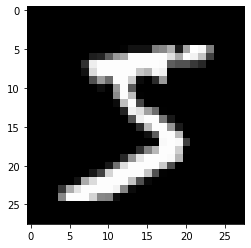

In [12]:
plt.imshow(x_train[0], cmap="gray")
plt.show()

# Model Building

In [13]:
model = Sequential() # Initializes a new Keras Sequential model
model.add(Input(shape=(784,))) # Add input layer that accepts 784 input values
model.add(Dense(units=100,)) # Add 1st hidden layer with 100 neurons
model.add(Dense(units=100,activation="relu")) # Add 2nd hidden layer with 100 neurons and relu activation
model.add(Dropout(0.1)) # Add a dropout layer with a dropout rate of 10% 
model.add(BatchNormalization()) # Add a batch normalization layer
model.add(Dense(units=10, activation = "softmax")) # Add output layer that outputs 10 output values with softmax activation

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
# Model Compilation
model.compile(optimizer=Adadelta(learning_rate=0.05),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [15]:
# Model Fitting
model.fit(x=x_train_flat_scaled, 
          y=y_train_ohe, 
          epochs=50, 
          validation_data=(x_test_flat_scaled, y_test_ohe), 
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.9424 - acc: 0.7180 - val_loss: 0.4117 - val_acc: 0.8888
Epoch 2/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.4046 - acc: 0.8898 - val_loss: 0.2944 - val_acc: 0.9202
Epoch 3/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.3184 - acc: 0.9123 - val_loss: 0.2465 - val_acc: 0.9317
Epoch 4/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2727 - acc: 0.9249 - val_loss: 0.2189 - val_acc: 0.9387
Epoch 5/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2445 - acc: 0.9318 - val_loss: 0.2000 - val_acc: 0.9439
Epoch 6/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2220 - acc: 0.9386 - val_loss: 0.1855 - val_acc: 0.9490
Epoch 7/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2057 - acc: 0.9427 - val_loss: 0.

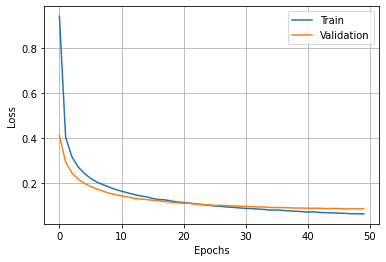

In [16]:
# Plotting loss changes over epochs
history = model.history.history

train_loss= history["loss"]
val_loss= history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

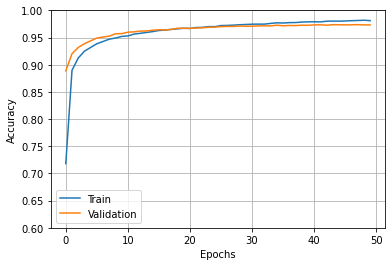

In [17]:
# Plotting accuracy changes over epochs
train_acc= history["acc"]
val_acc= history["val_acc"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.ylim(0.6,1)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 90,010
Trainable params: 89,810
Non-trainable params: 200
_________________________________________________________________


# Model Prediction

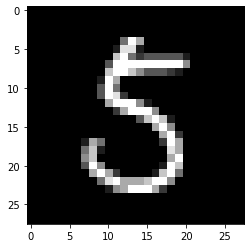

In [19]:
plt.imshow(x_test[153], cmap="gray")
plt.show()

In [20]:
preds = model.predict(x_test_flat)

In [21]:
preds.shape

(10000, 10)

In [22]:
print(preds[153])
print("The number in the picture is",np.argmax(preds[153]))

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The number in the picture is 5
